In [1]:
from pathlib import Path
import os
import pandas as pd

In [2]:
PATH_TO_PREDICTED_WEIGHTS = "predicted_weights.feather"

In [3]:
predicted_weights = pd.read_feather(PATH_TO_PREDICTED_WEIGHTS)
predicted_weights

,SeriesInstanceUID,set_type,PatientWeight,predicted_seg,predicted_seg_air,predicted_seg_75,predicted_seg_150,predicted_seg_HU,predicted_bin_75,predicted_bin_150,predicted_bin_HU
0,1.2.40.0.13.1.28611523484845610500759615941748...,Train,46.0,48.234245,47.186470,47.693912,48.656871,48.136034,47.970012,48.195121,48.091863
1,1.2.40.0.13.1.29372383852567236771106277061240...,Train,107.0,103.633934,103.343478,106.140522,106.838595,104.392039,105.991726,109.121961,107.125096
2,1.2.40.0.13.1.79959759832434680761991964822026...,Train,103.0,101.147275,98.615216,103.144809,102.975698,104.095018,102.036505,104.723513,101.353689
3,1.2.40.0.13.1.24209483531338511718074425173759...,Train,73.0,74.446626,72.268405,74.797190,73.019047,72.659328,74.427449,73.702254,75.144658
4,1.2.40.0.13.1.33709088158668319679757985067945...,Train,125.0,123.982316,121.806246,125.755410,124.973758,123.874377,124.700021,125.547125,123.305477
...,...,...,...,...,...,...,...,...,...,...,...
2926,1.2.40.0.13.1.14447032145816928538722256306280...,Train,75.0,72.646832,71.308413,74.356647,74.991659,73.334489,75.507219,73.349345,76.707647
2927,1.2.40.0.13.1.22055339428679588669178744381225...,Train,49.0,48.404057,48.971898,47.156894,47.475782,48.022808,49.264124,49.033725,48.177185
2928,1.2.40.0.13.1.15802889953337295246497758301352...,Train,63.0,65.397259,63.762695,62.284021,63.034013,62.423139,62.490165,62.551172,62.803160
2929,1.2.40.0.13.1.56298341537091980176000389528343...,Train,69.0,68.649711,68.598855,67.914534,68.215695,68.498209,67.225756,68.445236,70.711296


In [4]:
predictions_columns = ["predicted_seg", "predicted_seg_air", "predicted_seg_75", "predicted_seg_150", "predicted_seg_HU", "predicted_bin_75", "predicted_bin_150", "predicted_bin_HU"]
labels = ["Only Segmentations", "Segmentations + Air", "Segmentation + Bins 75", "Segmentation + Bins 150", "Segmentation + Bins HU", "Only Bins 75", "Only Bins 150", "Only Bins HU"]

training_df = predicted_weights[predicted_weights["set_type"] == "Train"]
testing_df = predicted_weights[predicted_weights["set_type"] == "Validation"]
testing_df

,SeriesInstanceUID,set_type,PatientWeight,predicted_seg,predicted_seg_air,predicted_seg_75,predicted_seg_150,predicted_seg_HU,predicted_bin_75,predicted_bin_150,predicted_bin_HU
10,1.2.40.0.13.1.28993903218149043348081372551120...,Validation,70.0,76.500166,74.204508,75.247807,73.416079,74.287590,68.925523,71.229838,69.888044
13,1.2.40.0.13.1.16484041000717506379634425838039...,Validation,107.0,92.205119,105.866774,121.377162,103.741663,118.509615,116.765284,106.819263,120.032421
14,1.2.40.0.13.1.15369166470016772395035691884739...,Validation,54.0,53.805467,53.335063,56.886409,57.146529,55.851901,60.125076,58.340070,57.144708
15,1.2.40.0.13.1.16934669894955102956241570719039...,Validation,73.0,68.304508,70.549218,71.603085,69.845943,71.477495,71.469218,70.911611,66.542662
16,1.2.40.0.13.1.12409468971190110111617676171220...,Validation,106.0,111.405677,108.660743,108.227203,105.851751,112.516705,103.474678,105.320422,111.453390
...,...,...,...,...,...,...,...,...,...,...,...
2900,1.2.40.0.13.1.26500194564796799093533783873459...,Validation,68.0,56.555375,57.973081,61.205034,59.017755,58.930116,61.065022,55.920931,60.780441
2903,1.2.40.0.13.1.26098479406692195187965168170625...,Validation,17.0,47.128943,40.887106,48.271365,48.330866,50.920627,53.017490,54.993386,50.431270
2916,1.2.40.0.13.1.11274952054175972577904171290621...,Validation,97.0,94.825848,88.268701,93.145468,88.461712,90.124966,93.219270,90.683700,92.393126
2922,1.2.40.0.13.1.41102358271786369454322905863480...,Validation,117.0,104.431719,104.245727,114.265686,114.672028,111.471264,114.766442,119.277902,114.476031


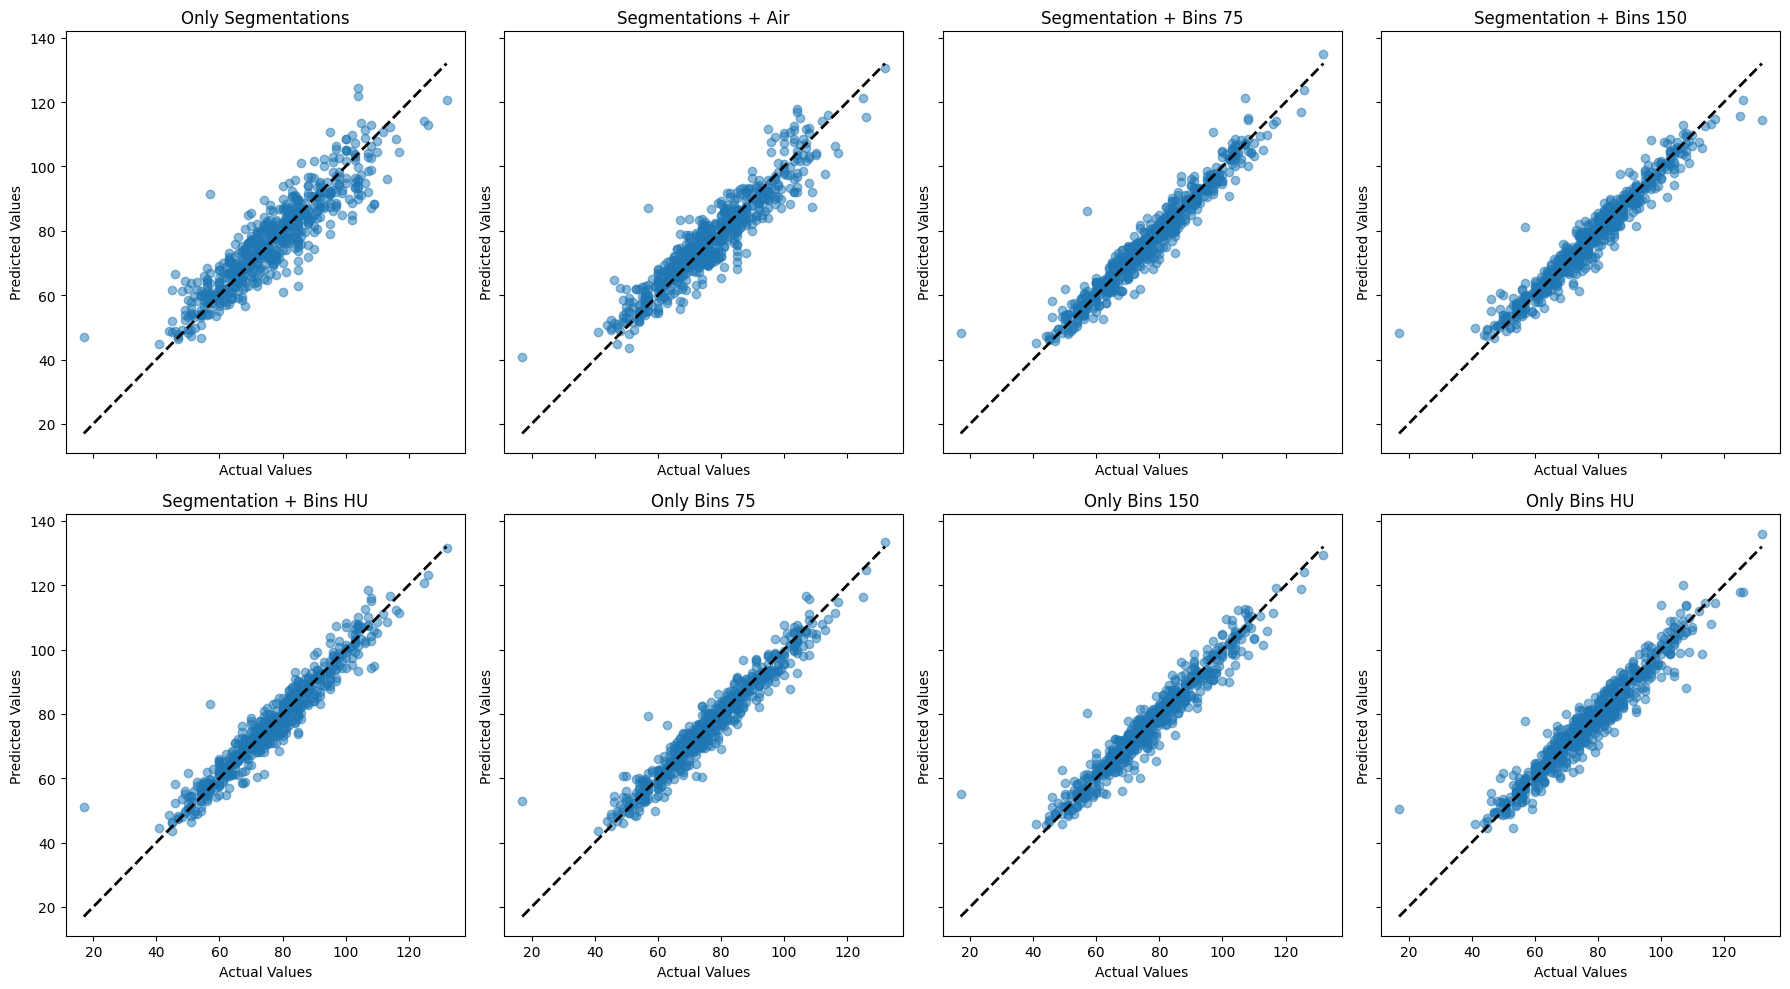

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

actual_values = testing_df['PatientWeight']  # Replace with the actual target column name

# Define number of rows and columns for the subplot grid
n_rows, n_cols = 2, 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the grid for easier indexing

for i, (col, label) in enumerate(zip(predictions_columns, labels)):
    axes[i].scatter(actual_values, testing_df[col], alpha=0.5)
    axes[i].plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=2)
    axes[i].set_title(label)
    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")

# Hide any unused subplots (not needed here since we have exactly 8 plots)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


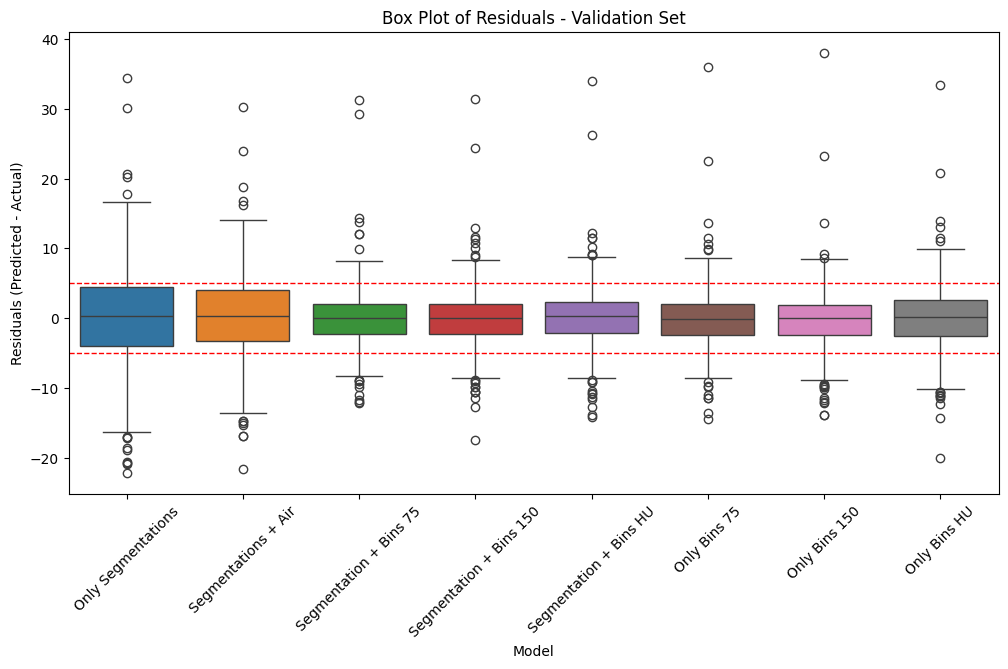

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for each model
residuals_df = testing_df[predictions_columns].subtract(testing_df['PatientWeight'], axis=0)
residuals_df.columns = labels  # Rename columns for easier readability in plots

# Plotting the boxplot of residuals
plt.figure(figsize=(12, 6))
sns.boxplot(data=residuals_df)
plt.xticks(rotation=45)
plt.title("Box Plot of Residuals - Validation Set")
plt.ylabel("Residuals (Predicted - Actual)")
plt.xlabel("Model")

plt.axhline(5, color='red', linestyle='--', linewidth=1)
plt.axhline(-5, color='red', linestyle='--', linewidth=1)

plt.show()


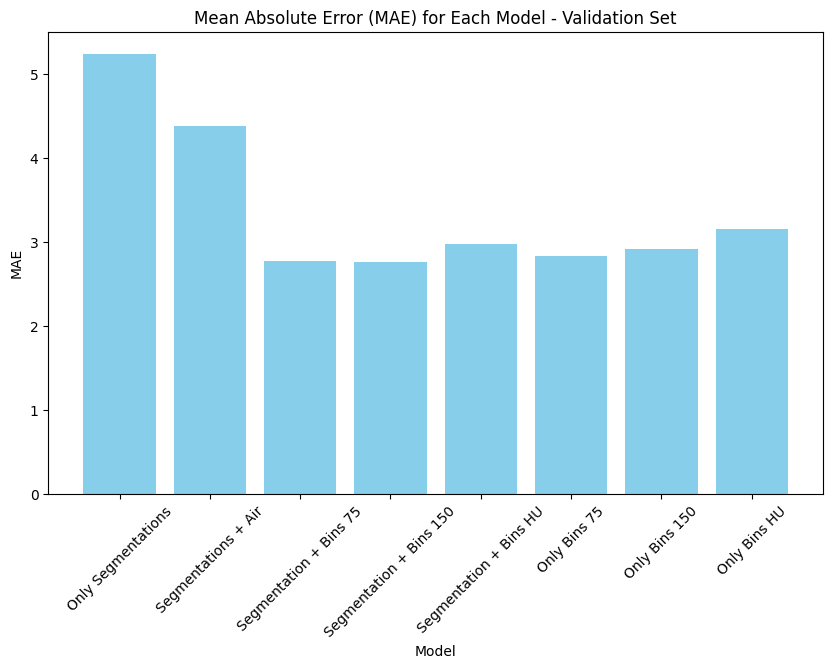

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each model
mae_values = [
    mean_absolute_error(testing_df['PatientWeight'], testing_df[col])
    for col in predictions_columns
]

# Plotting the MAE as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, mae_values, color="skyblue")
plt.xticks(rotation=45)
plt.title("Mean Absolute Error (MAE) for Each Model - Validation Set")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.show()

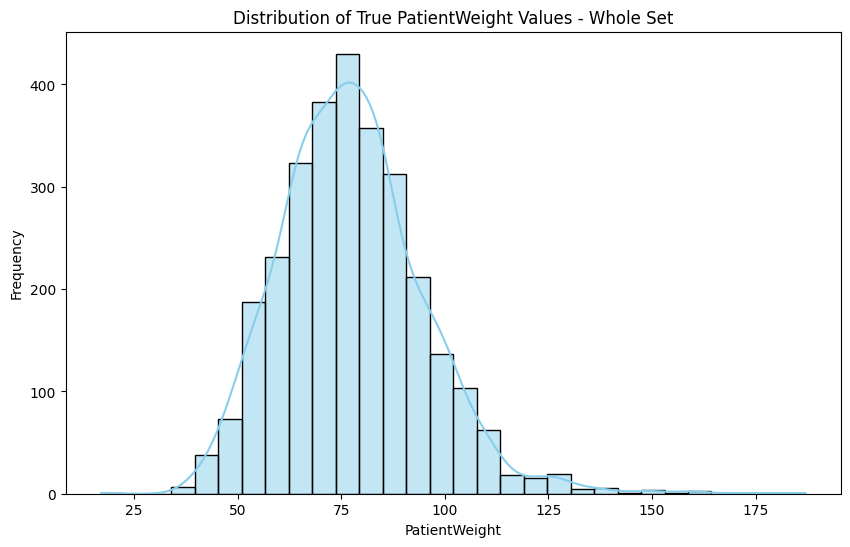

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of true values in PatientWeight
plt.figure(figsize=(10, 6))

# Histogram with KDE overlay
sns.histplot(predicted_weights['PatientWeight'], kde=True, color="skyblue", bins=30)
plt.title("Distribution of True PatientWeight Values - Whole Set")
plt.xlabel("PatientWeight")
plt.ylabel("Frequency")

plt.show()


In [10]:
limited_testing_df = testing_df[(testing_df['PatientWeight'] >= 50) & (testing_df['PatientWeight'] <= 110)]

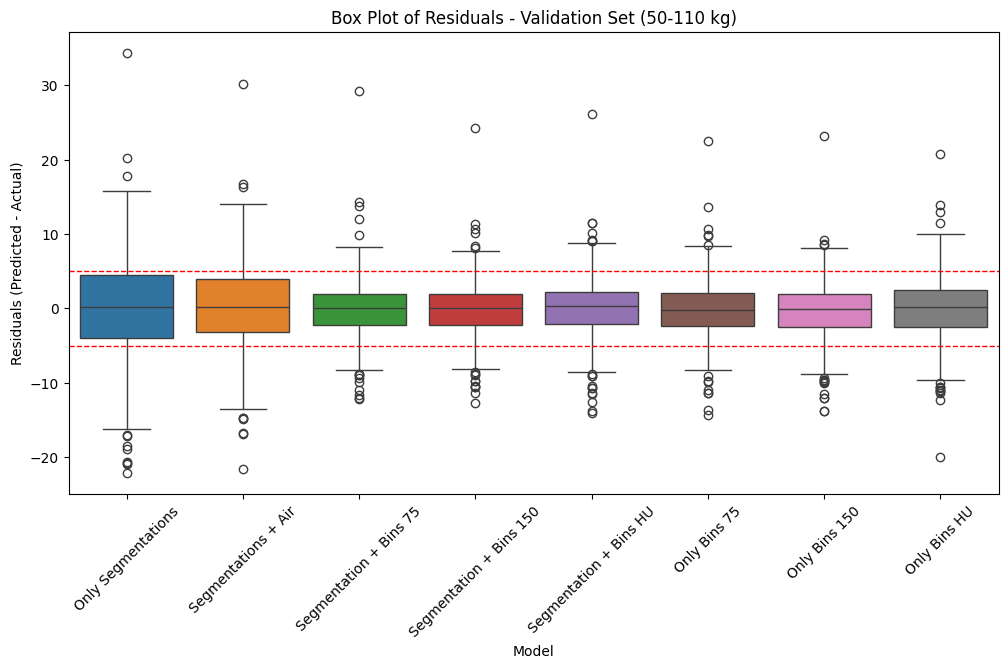

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for each model
residuals_df = limited_testing_df[predictions_columns].subtract(limited_testing_df['PatientWeight'], axis=0)
residuals_df.columns = labels  # Rename columns for easier readability in plots

# Plotting the boxplot of residuals
plt.figure(figsize=(12, 6))
sns.boxplot(data=residuals_df)
plt.xticks(rotation=45)
plt.title("Box Plot of Residuals - Validation Set (50-110 kg)")
plt.ylabel("Residuals (Predicted - Actual)")
plt.xlabel("Model")

plt.axhline(5, color='red', linestyle='--', linewidth=1)
plt.axhline(-5, color='red', linestyle='--', linewidth=1)

plt.show()


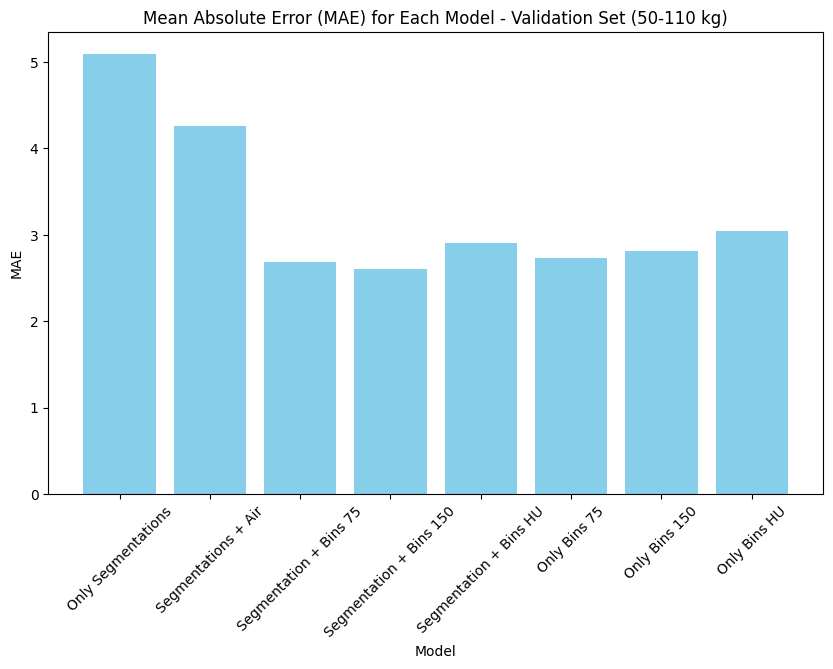

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each model
mae_values = [
    mean_absolute_error(limited_testing_df['PatientWeight'], limited_testing_df[col])
    for col in predictions_columns
]

# Plotting the MAE as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, mae_values, color="skyblue")
plt.xticks(rotation=45)
plt.title("Mean Absolute Error (MAE) for Each Model - Validation Set (50-110 kg)")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.show()